In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
%matplotlib inline

from pylab import rcParams


In [5]:
data = pd.read_csv("Pokemon.csv")

In [6]:
data.describe()

#      Total          HP      Attack     Defense     Sp. Atk  \
count  800.000000  800.00000  800.000000  800.000000  800.000000  800.000000   
mean   362.813750  435.10250   69.258750   79.001250   73.842500   72.820000   
std    208.343798  119.96304   25.534669   32.457366   31.183501   32.722294   
min      1.000000  180.00000    1.000000    5.000000    5.000000   10.000000   
25%    184.750000  330.00000   50.000000   55.000000   50.000000   49.750000   
50%    364.500000  450.00000   65.000000   75.000000   70.000000   65.000000   
75%    539.250000  515.00000   80.000000  100.000000   90.000000   95.000000   
max    721.000000  780.00000  255.000000  190.000000  230.000000  194.000000   

          Sp. Def       Speed  Generation  
count  800.000000  800.000000   800.00000  
mean    71.902500   68.277500     3.32375  
std     27.828916   29.060474     1.66129  
min     20.000000    5.000000     1.00000  
25%     50.000000   45.000000     2.00000  
50%     70.000000   65.000000     3.00000  
75%     90.000000   90.000000     5.00000  
max    230.000000  180.000000     6.00000

In [7]:
data.isna().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [8]:
data = data.fillna('None')

In [9]:
px.pie(data, names = "Type 1")

In [10]:
px.pie(data, names = "Type 2")

In [11]:
px.density_heatmap(data, x="Type 1", y="Type 2", marginal_x="histogram", marginal_y="histogram")


In [12]:
ff.create_distplot([data.Total],['Total'], bin_size = 10)

In [13]:
fig = px.sunburst(data, path=[px.Constant("Pokemon Gens"), 'Generation', 'Type 1'], color = 'Total',
                    color_continuous_scale='Rainbow',
                    color_continuous_midpoint=data.Total.mean()
                 )
fig.update_layout(
    title_text = 'Distribution of Pokemon types per generation'
)

fig.show()

In [14]:
fig = px.bar(data, x="Type 1", color="Type 1", animation_frame="Generation")
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1000
fig.show()

In [15]:
fig = px.scatter(data, x="Type 1", y="Total", color="Type 1",
          animation_frame="Generation", animation_group="Type 2",
          hover_name = 'Name')
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1000
fig.show()

In [16]:
legendaries = data[data.Legendary == True].sort_values("Total", ascending = False).sort_values('Total')
strongest_legendaries = list(legendaries.Name)[-1:-4:-1]
print("The strongest legendaries are", ', '.join(strongest_legendaries))

The strongest legendaries are MewtwoMega Mewtwo X, MewtwoMega Mewtwo Y, RayquazaMega Rayquaza


/Users/guru/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Legendary', ylabel='count'>

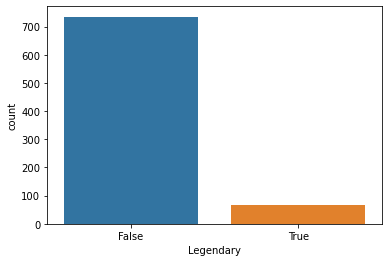

In [17]:
sns.countplot(data["Legendary"],
              order = data['Legendary'].value_counts().index)

<AxesSubplot:>

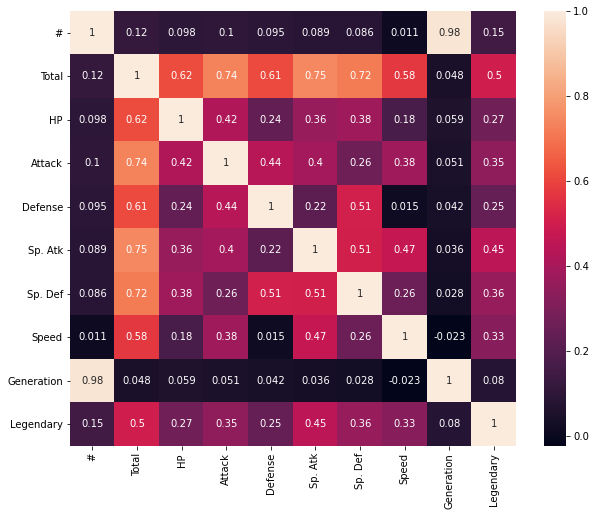

In [18]:
plt.figure(figsize=(10,8))
corr_df = data.corr()
sns.heatmap(corr_df,annot=True)

In [19]:
data_encoded =  pd.get_dummies(data, columns= ["Type 1", "Type 2"])

In [20]:
data_encoded["Legendary"] = [1 if x == True else 0 for x in data_encoded["Legendary"]]

In [21]:
data_encoded

#                   Name  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  \
0      1              Bulbasaur    318  45      49       49       65       65   
1      2                Ivysaur    405  60      62       63       80       80   
2      3               Venusaur    525  80      82       83      100      100   
3      3  VenusaurMega Venusaur    625  80     100      123      122      120   
4      4             Charmander    309  39      52       43       60       50   
..   ...                    ...    ...  ..     ...      ...      ...      ...   
795  719                Diancie    600  50     100      150      100      150   
796  719    DiancieMega Diancie    700  50     160      110      160      110   
797  720    HoopaHoopa Confined    600  80     110       60      150      130   
798  720     HoopaHoopa Unbound    680  80     160       60      170      130   
799  721              Volcanion    600  80     110      120      130       90   

     Speed  Generation  ...  Type 2_Grass  Type 2_Ground  Type 2_Ice  \
0       45           1  ...             0              0           0   
1       60           1  ...             0              0           0   
2       80           1  ...             0              0           0   
3       80           1  ...             0              0           0   
4       65           1  ...             0              0           0   
..     ...         ...  ...           ...            ...         ...   
795     50           6  ...             0              0           0   
796    110           6  ...             0              0           0   
797     70           6  ...             0              0           0   
798     80           6  ...             0              0           0   
799     70           6  ...             0              0           0   

     Type 2_None  Type 2_Normal  Type 2_Poison  Type 2_Psychic  Type 2_Rock  \
0              0              0              1               0            0   
1              0              0              1               0            0   
2              0              0              1               0            0   
3              0              0              1               0            0   
4              1              0              0               0            0   
..           ...            ...            ...             ...          ...   
795            0              0              0               0            0   
796            0              0              0               0            0   
797            0              0              0               0            0   
798            0              0              0               0            0   
799            0              0              0               0            0   

     Type 2_Steel  Type 2_Water  
0               0             0  
1               0             0  
2               0             0  
3               0             0  
4               0             0  
..            ...           ...  
795             0             0  
796             0             0  
797             0             0  
798             0             0  
799             0             1  

[800 rows x 48 columns]

In [22]:
from sklearn.metrics import roc_auc_score
y = data_encoded["Legendary"]
auc = []
features=[]

for x in data_encoded.drop(["#","Name","Legendary"], axis=1):
    features.append(x)
    auc.append(roc_auc_score(y, data_encoded[x]))
    
auc_score = pd.DataFrame(auc, features, columns = ["AUC"])
auc_score = auc_score.sort_values(by=["AUC"], ascending=False)
auc_score.head()

AUC
Total    0.968906
Sp. Atk  0.893354
Sp. Def  0.847650
Attack   0.834495
Speed    0.830926

# Trying without sampling the data and checking the overfitting issue

## Decision tree

In [23]:
X = data_encoded.drop("Name", 1) #droppinmg name then we have index 

In [24]:
y = X['Legendary']
X = X.drop('Legendary', 1)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, Y_test = train_test_split(X, y, random_state = 47, test_size = 0.25)

In [54]:
from sklearn.tree import DecisionTreeClassifier
DTree = DecisionTreeClassifier(criterion = 'entropy')
DTree.fit(X_train, y_train)
Y_pred =  DTree.predict(X_test)

In [57]:
from sklearn.metrics import accuracy_score
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=DTree.predict(X_train)))
print('Accuracy Score on the test data: ', accuracy_score(y_true=Y_test, y_pred=DTree.predict(X_test)))

Accuracy Score on train data:  1.0
Accuracy Score on the test data:  0.8809523809523809


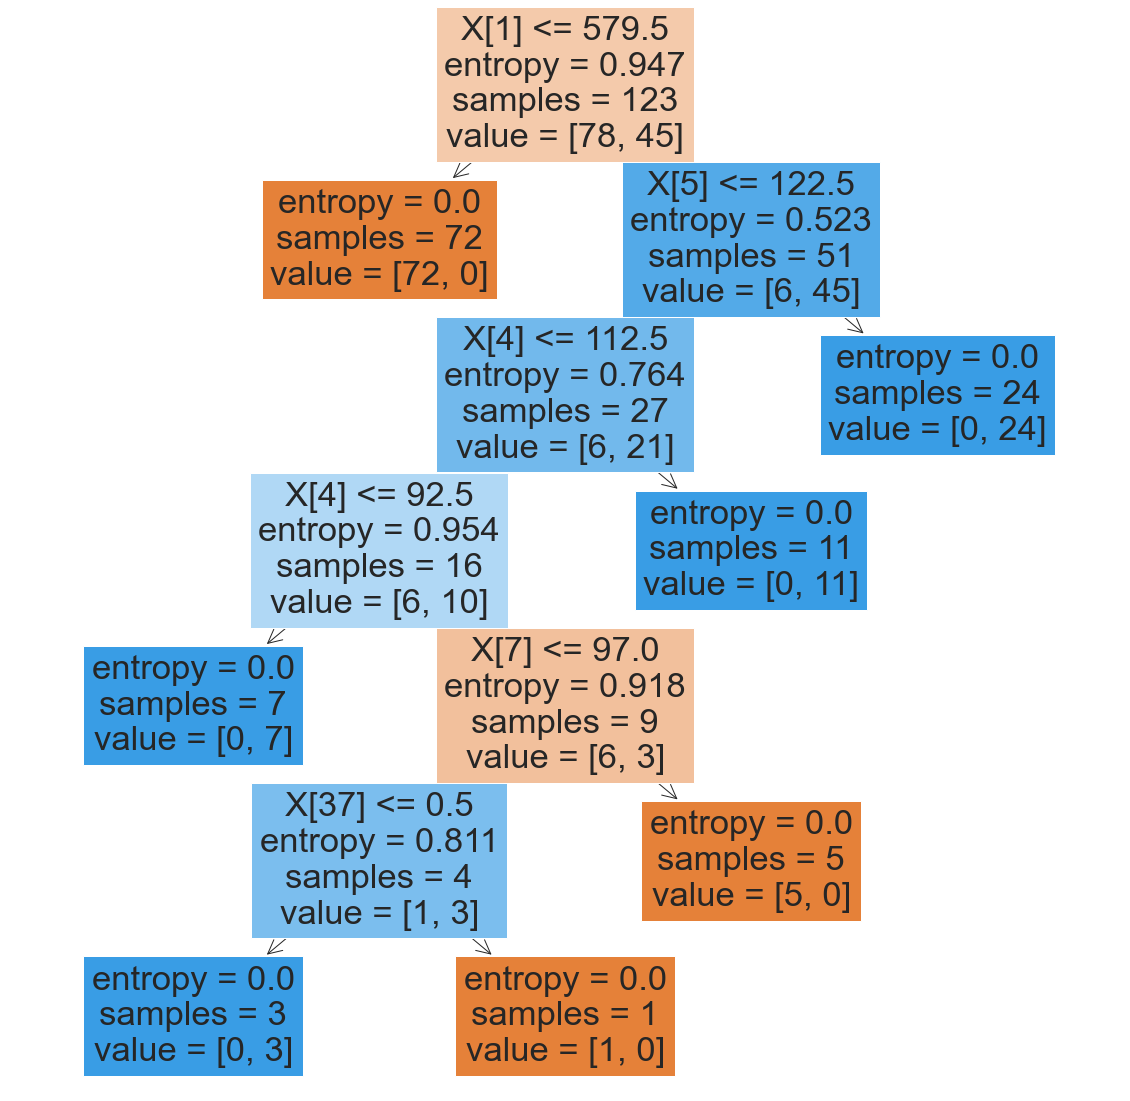

In [56]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.figure(figsize=(20,20))
plot_tree(DTree, filled=True)
plt.show()

In [43]:

accuracy = accuracy_score(Y_test,Y_pred)
report = classification_report(Y_pred, Y_test)
cm = confusion_matrix(Y_test, Y_pred)
print(report)
print(cm)
print(accuracy)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       182
           1       0.89      0.94      0.92        18

    accuracy                           0.98       200
   macro avg       0.94      0.97      0.96       200
weighted avg       0.99      0.98      0.99       200

[[180   1]
 [  2  17]]
0.985


Decision Tree(Gini): 0.965000 (0.024095)
Decision Tree(Entropy): 0.965000 (0.024095)


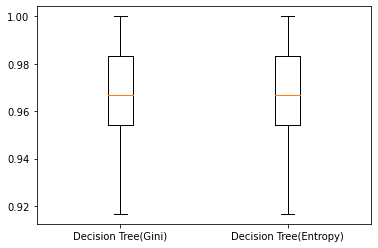

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
results=[]
models=[]
names=[]
models.append(('Decision Tree(Gini)', DecisionTreeClassifier(criterion = 'gini')))
models.append(('Decision Tree(Entropy)', DecisionTreeClassifier(criterion = 'entropy')))
for name, model in models:
        kfold = StratifiedKFold(n_splits=10)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
        results.append(cv_results)
        names.append(name)
        print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
pyplot.boxplot(results, labels=names)

pyplot.show()

In [ ]:
cm = confusion_matrix(Y_test, y_pred)  

print(cm)
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

## Naive bayes

In [27]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

Naive Bayes score:  0.4766666666666667
Model accuracy score with default hyperparameters: 0.4650
[[ 77 104]
 [  3  16]]
              precision    recall  f1-score   support

           0       0.96      0.43      0.59       181
           1       0.13      0.84      0.23        19

    accuracy                           0.47       200
   macro avg       0.55      0.63      0.41       200
weighted avg       0.88      0.47      0.56       200



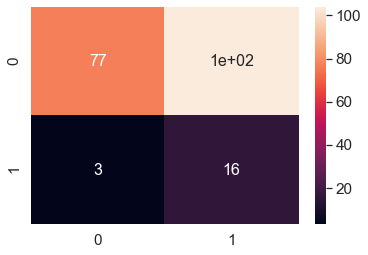

In [30]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

print("Naive Bayes score: ",nb.score(X_train, y_train))

y_pred = nb.predict(X_test)

#Accuracy score for test data

from sklearn.metrics import accuracy_score

accuracy_score(Y_test, y_pred)

# compute and print accuracy score
from sklearn.metrics import confusion_matrix  
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))

cm = confusion_matrix(Y_test, y_pred)  

print(cm)
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))
# plt.figure(figsize=(10,7))
import seaborn as sn
sn.set(font_scale=1.4) # for label size
sn.heatmap(cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

## SVM

In [30]:
#feature scaling
cols = X_train.columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled_train = scaler.fit_transform(X_train)

X_scaled_test = scaler.transform(X_test)

X_train_SVM = pd.DataFrame(X_scaled_train, columns=[cols])
X_test_SVM = pd.DataFrame(X_scaled_test, columns=[cols])

In [31]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC(100.0) 


# fit classifier to training set
svc.fit(X_train_SVM,y_train)


# make predictions on test set
y_pred=svc.predict(X_test_SVM)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning:

Pass C=100.0 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error



Model accuracy score with default hyperparameters: 0.9600
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       181
           1       0.79      0.79      0.79        19

    accuracy                           0.96       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.96      0.96      0.96       200

[[177   4]
 [  4  15]]


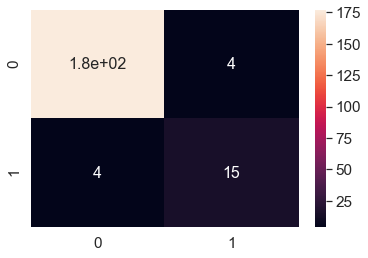

In [32]:
# compute and print accuracy score
from sklearn.metrics import confusion_matrix  
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))

cm = confusion_matrix(Y_test, y_pred)  
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))
print(cm)
# plt.figure(figsize=(10,7))
import seaborn as sn
sn.set(font_scale=1.4) # for label size
sn.heatmap(cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()


## Perceptron

In [33]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [34]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

y_pred = ppn.predict(X_test_std)
print('Misclassified examples: %d' % (Y_test != y_pred).sum())

print('Accuracy(test set): %.3f' % accuracy_score(Y_test, y_pred))
print('Accuracy (standardised test set): %.3f' % ppn.score(X_test_std, Y_test))


Misclassified examples: 13
Accuracy(test set): 0.935
Accuracy (standardised test set): 0.935


[[174   7]
 [  6  13]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       181
           1       0.65      0.68      0.67        19

    accuracy                           0.94       200
   macro avg       0.81      0.82      0.82       200
weighted avg       0.94      0.94      0.94       200



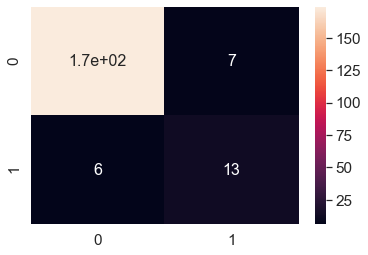

In [35]:
cm = confusion_matrix(Y_test, y_pred)  

print(cm)
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))
# plt.figure(figsize=(10,7))
import seaborn as sn
sn.set(font_scale=1.4) # for label size
sn.heatmap(cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

We can see that the accuracy is significantly higher due to the overfitting of false values in our dataset. So, we assume that  model is trained in such a way that it predicts false values even for the true ones. the number of legendary pokemons are significantly less so even if the prediction for those are wrong the model will still have better accuracy as it will still predict the non legendary pokemons correctly. This is an example of overfitting issue. But such a model is not a good fit.

## Predicting the legendary pokemons with our trained models without random sampling

just taking the legendary pokemons from the dataset.

In [36]:
legendary_sample = data_encoded.loc[data_encoded["Legendary"] == 1]


In [37]:
print(legendary_sample["Legendary"])
print(legendary_sample)

156    1
157    1
158    1
162    1
163    1
      ..
795    1
796    1
797    1
798    1
799    1
Name: Legendary, Length: 65, dtype: int64
       #                 Name  Total   HP  Attack  Defense  Sp. Atk  Sp. Def  \
156  144             Articuno    580   90      85      100       95      125   
157  145               Zapdos    580   90      90       85      125       90   
158  146              Moltres    580   90     100       90      125       85   
162  150               Mewtwo    680  106     110       90      154       90   
163  150  MewtwoMega Mewtwo X    780  106     190      100      154      100   
..   ...                  ...    ...  ...     ...      ...      ...      ...   
795  719              Diancie    600   50     100      150      100      150   
796  719  DiancieMega Diancie    700   50     160      110      160      110   
797  720  HoopaHoopa Confined    600   80     110       60      150      130   
798  720   HoopaHoopa Unbound    680   80     160       60 

In [38]:
X_test = legendary_sample.drop("Name", 1) #droppinmg name then we have index 
X_test = X_test.drop('Legendary', 1)

In [39]:
y = legendary_sample['Legendary']

In [40]:
y_pred1 = nb.predict(X_test)
y_pred2 = DTree.predict(X_test)
y_pred3 =svc.predict(X_test)
y_pred4 = ppn.predict(X_test)

In [42]:
#Accuracy score for test data

from sklearn.metrics import accuracy_score

a=accuracy_score(y, y_pred1)
b=accuracy_score(y, y_pred2)
c=accuracy_score(y, y_pred3)
d=accuracy_score(y, y_pred4)
print(a,b,c,d)

from sklearn.metrics import confusion_matrix  
cm1 = confusion_matrix(y, y_pred1)  
cm2 = confusion_matrix(y, y_pred2)  
cm3 = confusion_matrix(y, y_pred3)  
cm4 = confusion_matrix(y, y_pred4)  

print(cm1)
print(cm2)
print(cm3)
print(cm4)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y,y_pred1))
print(classification_report(y,y_pred2))
print(classification_report(y,y_pred3))
print(classification_report(y,y_pred4))

0.9538461538461539 0.9538461538461539 0.0 1.0
[[ 0  0]
 [ 3 62]]
[[ 0  0]
 [ 3 62]]
[[ 0  0]
 [65  0]]
[[65]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.95      0.98        65

    accuracy                           0.95        65
   macro avg       0.50      0.48      0.49        65
weighted avg       1.00      0.95      0.98        65

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.95      0.98        65

    accuracy                           0.95        65
   macro avg       0.50      0.48      0.49        65
weighted avg       1.00      0.95      0.98        65

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00      65.0

    accuracy                           0.00      65.0
   macro avg      

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control 

As you see the accuracies are still better after taking just the legendary data set for testing. this can be because the model prediction depends upon different charecters as number of features are quite large our model still performs better even after overfitting of the prediction variable.

## Using random sampling to avoid overfitting issue

Data is very skewed so taking a sample , of 100
and also with aoc we can remove few fields but no....


so remove total ????

In [45]:
normal = data_encoded.loc[data_encoded["Legendary"] == 0]
legendary = data_encoded.loc[data_encoded["Legendary"] == 1]

In [46]:
#lets just take 100 from normal 
sampledNormal = normal.sample(100)

notSampledNormal = normal.loc[[x not in [y for y in sampledNormal["Name"]] for x in normal["Name"]]]

In [47]:
X = pd.concat([legendary, sampledNormal])
X = X.drop("Name", 1) #droppinmg name then we have index 
y = X['Legendary']
X = X.drop('Legendary', 1)

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, Y_test = train_test_split(X, y, random_state = 47, test_size = 0.25)

In [58]:
from sklearn.tree import DecisionTreeClassifier
DTree = DecisionTreeClassifier(criterion = 'entropy')
DTree.fit(X_train, y_train)
R_pred =  DTree.predict(X_test)

In [67]:
from sklearn.metrics import accuracy_score
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=DTree.predict(X_train)))
print('Accuracy Score on the test data: ', accuracy_score(y_true=Y_test, y_pred=DTree.predict(X_test)))

Accuracy Score on train data:  1.0
Accuracy Score on the test data:  0.8809523809523809


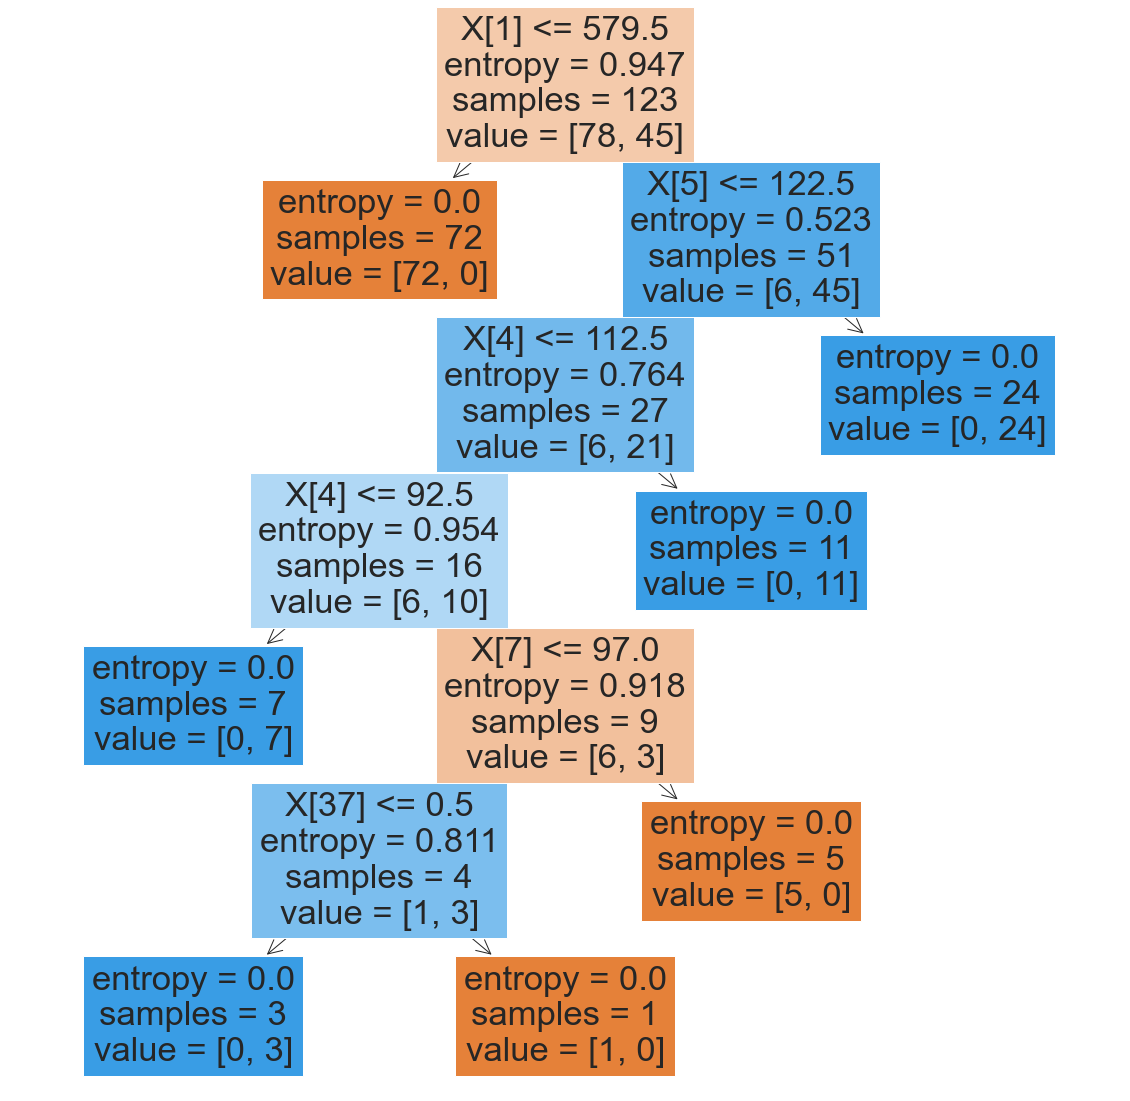

In [60]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.figure(figsize=(20,20))
plot_tree(DTree, filled=True)
plt.show()

Decision Tree(Gini): 0.869872 (0.054547)
Decision Tree(Entropy): 0.910897 (0.084918)


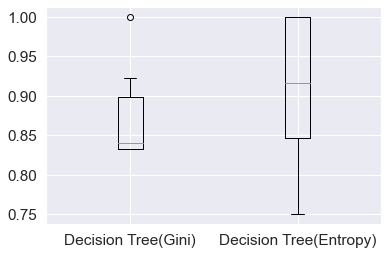

In [61]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
results=[]
models=[]
names=[]
models.append(('Decision Tree(Gini)', DecisionTreeClassifier(criterion = 'gini')))
models.append(('Decision Tree(Entropy)', DecisionTreeClassifier(criterion = 'entropy')))
for name, model in models:
        kfold = StratifiedKFold(n_splits=10)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
        results.append(cv_results)
        names.append(name)
        print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
pyplot.boxplot(results, labels=names)

pyplot.show()

0.0
0.022675736961451254
0.4535147392290249


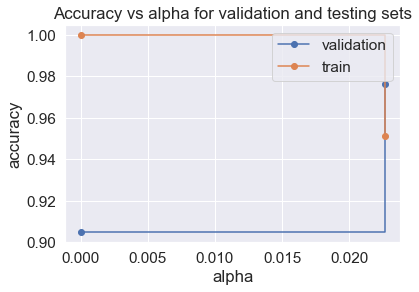

In [62]:
clf = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
path = clf.cost_complexity_pruning_path(X_test, Y_test)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
clfs = []
for ccp_alpha in ccp_alphas:
    print(ccp_alpha)
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
val_scores = [clf.score(X_test, Y_test) for clf in clfs]
train_scores = [clf.score(X_train, y_train) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for validation and testing sets")
ax.plot(ccp_alphas, val_scores, marker='o', label="validation",
        drawstyle="steps-post")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.legend()
plt.show()

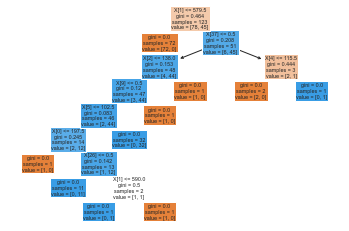

Accuracy Score on train data:  1.0
Accuracy Score on the test data:  0.9047619047619048


In [63]:
clf1 = DecisionTreeClassifier(random_state=0, ccp_alpha=0.0).fit(X_train, y_train)
tree.plot_tree(clf1, filled=True)
plt.show()

# Accuracy on Traing and Testing data is calculated

print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=clf1.predict(X_train)))
print('Accuracy Score on the test data: ', accuracy_score(y_true=Y_test, y_pred=clf1.predict(X_test)))

In [64]:
print(clfs)

[DecisionTreeClassifier(random_state=0), DecisionTreeClassifier(ccp_alpha=0.022675736961451254, random_state=0)]


In [65]:
accuracy = accuracy_score(Y_test,R_pred)
report = classification_report(R_pred, Y_test)
cm = confusion_matrix(Y_test, R_pred)
print(report)
print(cm)
print(accuracy)

              precision    recall  f1-score   support

           0       0.95      0.84      0.89        25
           1       0.80      0.94      0.86        17

    accuracy                           0.88        42
   macro avg       0.88      0.89      0.88        42
weighted avg       0.89      0.88      0.88        42

[[21  1]
 [ 4 16]]
0.8809523809523809


## Gaussian Naive Bayes

In [54]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [55]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [56]:
print("Naive Bayes score: ",nb.score(X_train, y_train))

Naive Bayes score:  0.7235772357723578


In [57]:
y_pred = nb.predict(X_test)

In [58]:
#Accuracy score for test data

from sklearn.metrics import accuracy_score

accuracy_score(Y_test, y_pred)

0.5714285714285714

In [59]:
from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(Y_test, y_pred)  

print(cm)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test,y_pred))

[[ 9 13]
 [ 5 15]]
              precision    recall  f1-score   support

           0       0.64      0.41      0.50        22
           1       0.54      0.75      0.63        20

    accuracy                           0.57        42
   macro avg       0.59      0.58      0.56        42
weighted avg       0.59      0.57      0.56        42



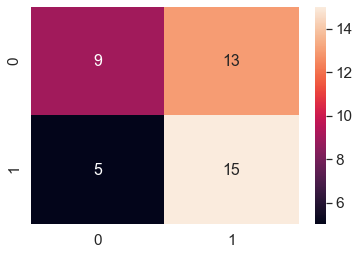

In [60]:
# plt.figure(figsize=(10,7))
import seaborn as sn
sn.set(font_scale=1.4) # for label size
sn.heatmap(cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [61]:
models = []
models.append(('Naive Bayes', GaussianNB()))

In [62]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=None)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)

## SVM

In [63]:
#feature scaling
cols = X_train.columns

In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [65]:
X_train_SVM = pd.DataFrame(X_train, columns=[cols])

In [66]:
X_test_SVM = pd.DataFrame(X_test, columns=[cols])

Default hyperparameter means C=1.0, kernel=rbf and gamma=auto among other parameters.
we should increase the value of C as higher C means fewer outliers. So, I will run SVM with kernel=rbf and C=100.0.

In [67]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC(100.0) 


# fit classifier to training set
svc.fit(X_train_SVM,y_train)


# make predictions on test set
y_pred=svc.predict(X_test_SVM)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning:

Pass C=100.0 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error



In [68]:
# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.8571


In [69]:
cm = confusion_matrix(Y_test, y_pred)  

print(cm)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test,y_pred))

[[19  3]
 [ 3 17]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        22
           1       0.85      0.85      0.85        20

    accuracy                           0.86        42
   macro avg       0.86      0.86      0.86        42
weighted avg       0.86      0.86      0.86        42



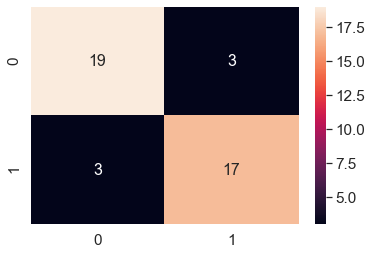

In [70]:
# plt.figure(figsize=(10,7))
import seaborn as sn
sn.set(font_scale=1.4) # for label size
sn.heatmap(cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

## Perceptron

In [71]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [72]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [73]:
y_pred = ppn.predict(X_test_std)
print('Misclassified examples: %d' % (Y_test != y_pred).sum())

Misclassified examples: 8


In [74]:
print('Accuracy(test set): %.3f' % accuracy_score(Y_test, y_pred))
print('Accuracy (standardised test set): %.3f' % ppn.score(X_test_std, Y_test))

Accuracy(test set): 0.810
Accuracy (standardised test set): 0.810


In [75]:
cm = confusion_matrix(Y_test, y_pred)  

print(cm)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test,y_pred))

[[17  5]
 [ 3 17]]
              precision    recall  f1-score   support

           0       0.85      0.77      0.81        22
           1       0.77      0.85      0.81        20

    accuracy                           0.81        42
   macro avg       0.81      0.81      0.81        42
weighted avg       0.81      0.81      0.81        42



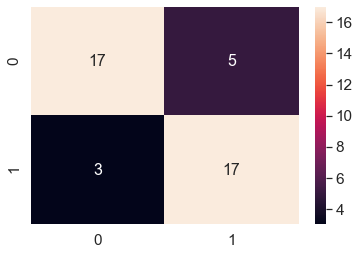

In [76]:
# plt.figure(figsize=(10,7))
import seaborn as sn
sn.set(font_scale=1.4) # for label size
sn.heatmap(cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning:

Pass C=100 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error



Naive Bayes: 0.528205 (0.102732)
Decision Tree: 0.926282 (0.067612)
Perceptron: 0.845513 (0.077107)
SVC: 0.862821 (0.070174)


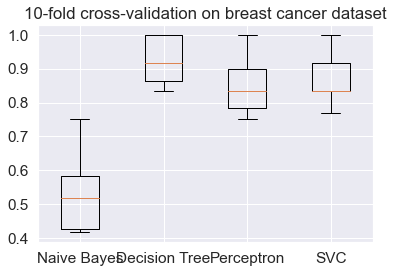

In [77]:
models = []
models.append(('Naive Bayes', GaussianNB()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Perceptron', Perceptron(eta0=0.1, random_state=0, max_iter=150)))
models.append(('SVC',SVC(100)))

# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=None)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('10-fold cross-validation on breast cancer dataset')
pyplot.show()